<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/moni/monai_MedNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting to know the [MONAI framework](https://monai.io/). Loosely following the [YouTube MONAI Bootcamp 2023](https://www.youtube.com/playlist?list=PLtoSVSQ2XzyAJAGzaHF0nUIkav0BnxhrJ).

[MONAI Bootcamp GitHub Repository](https://github.com/Project-MONAI/monai-bootcamp)

# Settings

In [1]:
# Check the used hardwarde. Recall to set runtime type to GPU.
!nvidia-smi

Mon Nov 27 15:15:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installs

In [2]:
!pip install monai # For 'import monai'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.8 MB/s eta 0:00:00


In [3]:
!pip install monai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 34.1 MB/s 

In [4]:
!pip install pynrrd # For 'import nrrd'

In [5]:
!pip install pydicom # E.g. for the TCIS dataset, which uses the DICOM format

In [6]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.1.0"

2023-11-27 15:17:18.550678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 15:17:18.550727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 15:17:18.550766: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 15:17:18.558770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 15:17:19.559578: W tensorflow/c

## Imports

### General

In [16]:
from typing import List, Dict, Set, Tuple, Any, Optional, Union, Callable
import time
import os
from pathlib import Path
import tempfile
import numpy as np
import pandas as pd
from glob import glob

import multiprocessing
import resource
import json

import psutil
import torch

### Evaluation

In [17]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import PIL
from scipy import ndimage
import skimage
import nrrd

### Monai

In [45]:
from monai.apps import MedNISTDataset, download_and_extract
from monai.apps.tcia import TCIA_LABEL_DICT
from monai.config import print_config, KeysCollection
from monai.data import (
    decollate_batch,
    partition_dataset_classes,
    Dataset,
    PersistentDataset,
    DataLoader
)
from monai.engines import SupervisedTrainer, SupervisedEvaluator
from monai.handlers import (
    CheckpointSaver,
    from_engine,
    LrScheduleHandler,
    MeanSquaredError,
    MetricsSaver,
    StatsHandler,
    TensorBoardStatsHandler,
    ValidationHandler
)
from monai.inferers import SimpleInferer
from monai.metrics import ROCAUCMetric
from monai.networks import eval_mode
from monai.networks.nets import DenseNet121
import monai.transforms as mt
from monai.utils import set_determinism, first
rseed = 42
set_determinism(seed=rseed)

In [10]:
import nibabel as nib # For NIfTI Images

#### For evaluations

In [11]:
# Model evaluation using sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [12]:
# Model evaluation using TSNE plots
from sklearn.manifold import TSNE

In [13]:
print_config()

MONAI version: 1.3.0
Numpy version: 1.23.5
Pytorch version: 2.1.0+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 4.0.2
scikit-image version: 0.19.3
scipy version: 1.11.3
Pillow version: 9.4.0
Tensorboard version: 2.14.1
gdown version: 4.6.6
TorchVision version: 0.16.0+cu118
tqdm version: 4.66.1
lmdb version: 1.4.1
psutil version: 5.9.5
pandas version: 1.5.3
einops version: 0.7.0
transformers version: 4.21.3
mlflow version: 2.8.1
pynrrd version: 1.0.0
clearml version: 1.13.2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



# Dataset Example: MedMNIST - Large-scale lightweight benchmark for 2D and 3D biomedical image classification
- [MedMNIST Homepage](https://medmnist.com/)

In [21]:
root_dir = tempfile.mkdtemp()
print(root_dir)

/tmp/tmpieh_g8n6


In [22]:
# Download and save the dataset.
resource = "https://www.dropbox.com/s/5wwskxctvcxiuea/MedNIST.tar.gz?dl=1"
md5 = "0bc7306e7427e00ad1c5526a6677552d"

path_ds_tar = os.path.join(root_dir, "MedNIST.tar.gz")
path_ds = os.path.join(root_dir, "MedNIST")
if not os.path.exists(path_ds):
    download_and_extract(resource, path_ds_tar, root_dir, md5)

MedNIST.tar.gz: 59.0MB [00:04, 15.0MB/s]                            

2023-11-27 15:23:08,204 - INFO - Downloaded: /tmp/tmpieh_g8n6/MedNIST.tar.gz


2023-11-27 15:23:08,318 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-11-27 15:23:08,320 - INFO - Writing into directory: /tmp/tmpieh_g8n6.


In [29]:
# List all subdirectories in the dir of the dataset. The subdirectories link to
# data of specific classes.
subdirs: List[str] = sorted(filter(os.path.isdir, glob(f"{path_ds}/*")))
subdirs

['/tmp/tmpieh_g8n6/MedNIST/AbdomenCT',
 '/tmp/tmpieh_g8n6/MedNIST/BreastMRI',
 '/tmp/tmpieh_g8n6/MedNIST/CXR',
 '/tmp/tmpieh_g8n6/MedNIST/ChestCT',
 '/tmp/tmpieh_g8n6/MedNIST/Hand',
 '/tmp/tmpieh_g8n6/MedNIST/HeadCT']

In [33]:
# Get the basename (last name in the link) of all subdirs.
# These are the names of the class to which the images belong.
class_names: List[str] = list(map(os.path.basename, subdirs))
num_class: int = len(class_names)
class_names

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [34]:
# Load the filenames of each image for each class separately.
image_files: List[List[str]] = [sorted(glob(f"{d}/*")) for d in subdirs]
num_each: List[int] = [len(image_files[i]) for i in range(num_class)]

In [37]:
# Concatenate all image file names into one list.
image_files_list: List[str] = sum(image_files, [])

In [39]:
# Construct a list of class, indicating for each image to which class it belongs to.
image_class: List[int] = sum([[i] * n for i, n in enumerate(num_each)], [])

num_total: int = len(image_class)
image_width, image_height = PIL.Image.open(image_files_list[0]).size

print(f"Total image count:  {num_total}")
print(f"Image dimensions:   {image_width} x {image_height}")
print(f"Label names:        {class_names}")
print(f"Label counts:       {num_each}")

Total image count:  58954
Image dimensions:   64 x 64
Label names:        ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts:       [10000, 8954, 10000, 10000, 10000, 10000]


### Data visualization

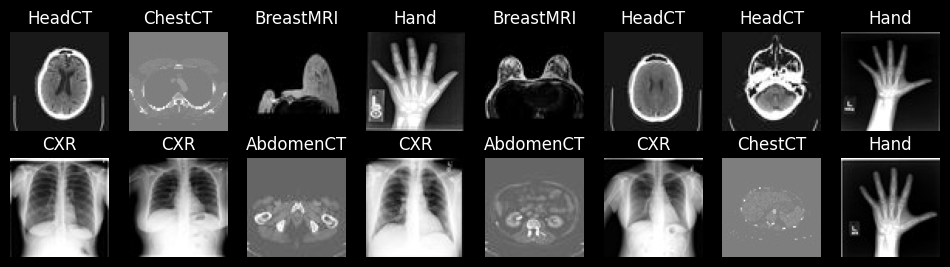

In [44]:
rows = 2
cols = 8
plt.subplots(rows, cols, figsize=(cols*1.5, rows*1.5))
for i, k in enumerate(np.random.randint(num_total, size=rows*cols)):
    img = PIL.Image.open(image_files_list[k])
    plt.subplot(rows, cols, i + 1)
    plt.axis("off")
    plt.title(class_names[image_class[k]])
    plt.imshow(np.array(img), cmap="gray", vmin=0, vmax=255)

### Splitting the dataset into training, validation and test sets

In [46]:
parts = partition_dataset_classes(
    data = np.arange(len(image_files_list)),
    classes = image_class,
    ratios = (8, 1, 1),
    shuffle = True,
    seed = rseed
)

# According to the part splits, assemble the datasets.
image_sets = [list(), list(), list()]
label_sets = [list(), list(), list()]

for i, part in enumerate(parts):
    image_sets[i] = [image_files_list[idx] for idx in part]
    label_sets[i] = [image_class[idx] for idx in part]

train_x, val_x, test_x = image_sets
train_y, val_y, test_y = label_sets

print(f"Training count: {len(train_x)}, Validation count: {len(val_x)}, Test count: {len(test_x)}")

Training count: 47163, Validation count: 5895, Test count: 5895


### Transforms definitions

In [49]:
# Defining the transforms.
aug_prob: float = .5
aug_transforms = mt.Compose([
    mt.RandRotate(range_x=15, prob=aug_prob, keep_size=True).set_random_state(rseed),
    mt.RandFlip(spatial_axis=0, prob=aug_prob).set_random_state(rseed),
    mt.RandZoom(min_zoom=.9, max_zoom=1.1, prob=aug_prob).set_random_state(rseed),
])

loading_transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    mt.ScaleIntensity(),
    aug_transforms
])

train_transforms = mt.Compose([
    loading_transforms,
    aug_transforms
])

val_transforms = mt.Compose([loading_transforms])

act = mt.Compose([mt.Activations(softmax=True)])
to_onehot = mt.Compose([mt.AsDiscrete(to_onehot=num_class)])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


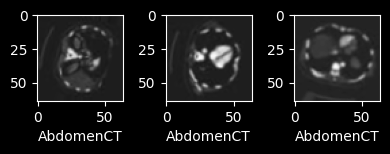

In [62]:
# Test the fuctionality of the transforms.
plt.subplots(1, 3, figsize=(4, 4))
for i in range(0,3):
    img = image_files_list[i]
    test_output = train_transforms(img)
    #test_output = val_transforms(img)

    # Plot the transformed images.
    arr = np.array(test_output[0])
    plt.subplot(2, 3, i + 1)
    plt.xlabel(class_names[image_class[i]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=1)
plt.tight_layout()
plt.show()

### Custom Dataset definition

In [70]:
batch_size = 512
num_workers = 2

class MedNISTDataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]


train_ds = MedNISTDataset(train_x, train_y, train_transforms)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)

val_ds = MedNISTDataset(val_x, val_y, val_transforms)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=num_workers)

test_ds = MedNISTDataset(test_x, test_y, val_transforms)
test_loader = DataLoader(test_ds, batch_size=batch_size, num_workers=num_workers)

## Training

### Training parameters

In [71]:
learning_rate: float = 1e-5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = DenseNet121(spatial_dims=2, in_channels=1, out_channels=num_class).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), learning_rate)

In [72]:
epoch_num: int = 4
best_metric: float = -1
best_metric_epoch: float = -1
auc_metric = ROCAUCMetric()

# Save some stats.
epoch_loss_values = list()
metric_values = list()

### Network training

In [73]:
for epoch in range(epoch_num):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epoch_num}")

    epoch_loss: float = 0
    step: int = 1

    steps_per_epoch: int = len(train_ds) // train_loader.batch_size

    # Put the network in train mode. This tells the network and its modules to
    # enable training elements such as normalisation and dropout, where applicable.
    net.train()
    for batch_data in train_loader:
        # Move the data to the GPU
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)

        # Prepare the gradients for this step's back propagation.
        optimizer.zero_grad()

        # Run the network forwards.
        outputs = net(inputs)

        # Run the loss function on the outputs.
        loss = loss_function(outputs, labels)

        # Compute the gradients.
        loss.backward()

        # Tell the optimizer to update the weights according to the gradients
        # and its internal optimisation strategy.
        optimizer.step()

        # Save and print the loss for this item.
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size + 1}, training_loss: {loss.item():.4f}")
        step += 1

    # Save and print the average loss in this batch.
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    # Evaluation:
    # After each epoch, run the metrics to evaluate it, and, if they are an improvement,
    # save the model out.

    # Switch off training features of the network for the evaluation pass.
    net.eval()

    # 'with torch.no_grad()' switches off gradient calculation for the scope of its context.
    with torch.no_grad():
        # Create lists in which we will save the validation results.
        preds = list()
        labels = list()

        # Iterate over each batch of images and run them through the network in evaluation mode.
        for val_data in val_loader:
            val_images, val_labels = val_data[0].to(device), val_data[1].to(device)

            # Run the network.
            val_pred = net(val_images)

            preds.append(val_pred)
            labels.append(val_labels)

        # Concatenate the predicted labels with each other and the actual labels with each other.
        y_pred = torch.cat(preds)
        y = torch.cat(labels)

        # Lets use the area under the receiver operating characteristic (ROC) curve to determine
        # whether this epoch has improved the best performance of the network so far.
        # If this is the case, we save the network in this state.
        y_onehot = [to_onehot(i) for i in decollate_batch(y, detach=False)]
        y_pred_act = [act(i) for i in decollate_batch(y_pred)]

        auc_metric(y_pred_act, y_onehot)
        auc_value = auc_metric.aggregate()
        auc_metric.reset()
        metric_values.append(auc_value)

        acc_value = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric = acc_value.sum().item() / len(acc_value)

        if auc_value > best_metric:
            best_metric = auc_value
            best_metric_epoch = epoch + 1
            torch.save(net.state_dict(), os.path.join(root_dir, "best_metric_model.pth"))
            print("Saved new best metric network!")

        print(
            f"Current epoch: {epoch + 1} / Current AUC: {auc_value:.4f} /"
            f"Current accuracy: {acc_metric:.4f} / Best AUC: {best_metric:.4f} /"
            f" at epoch: {best_metric_epoch}"
        )

print(f"Training completed:\n\tBest_metric: {best_metric:.4f} at epoch: {best_metric_epoch}.")

----------
epoch 1/4
1/93, training_loss: 1.7486
2/93, training_loss: 1.7282
3/93, training_loss: 1.6930
4/93, training_loss: 1.6742
5/93, training_loss: 1.6501
6/93, training_loss: 1.6196
7/93, training_loss: 1.5926
8/93, training_loss: 1.5710
9/93, training_loss: 1.5438
10/93, training_loss: 1.5226
11/93, training_loss: 1.4990
12/93, training_loss: 1.4730
13/93, training_loss: 1.4462
14/93, training_loss: 1.4388
15/93, training_loss: 1.4058
16/93, training_loss: 1.3940
17/93, training_loss: 1.3593
18/93, training_loss: 1.3580
19/93, training_loss: 1.3460
20/93, training_loss: 1.3165
21/93, training_loss: 1.3044
22/93, training_loss: 1.3042
23/93, training_loss: 1.2738
24/93, training_loss: 1.2301
25/93, training_loss: 1.2255
26/93, training_loss: 1.2551
27/93, training_loss: 1.1950
28/93, training_loss: 1.1684
29/93, training_loss: 1.1521
30/93, training_loss: 1.1579
31/93, training_loss: 1.1074
32/93, training_loss: 1.1366
33/93, training_loss: 1.1061
34/93, training_loss: 1.0836
35

# Evaluation

### Plotting average loss and validation AUC

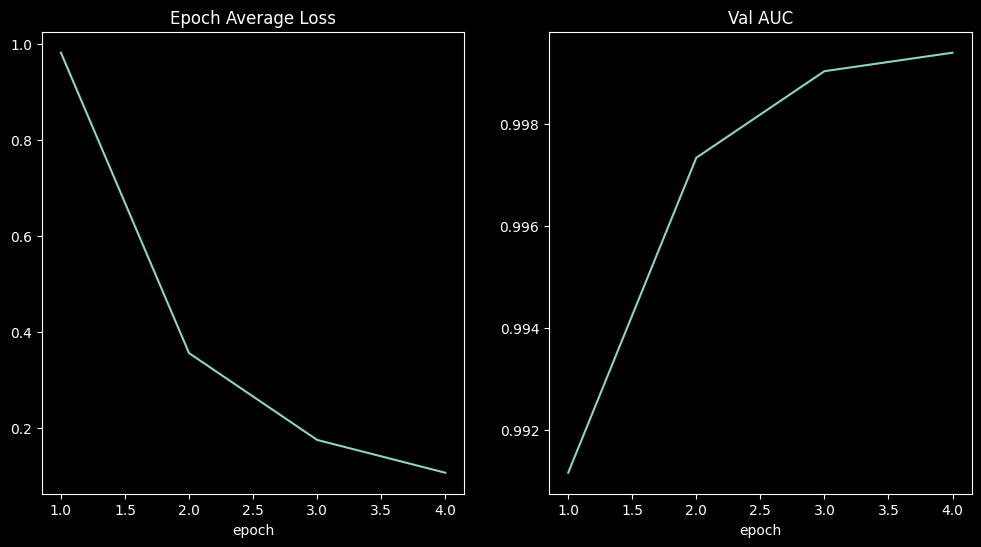

In [74]:
# Since the metrics where saved to lists, we can simply plot them.
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
# Plot the loss.
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
# Plot the validation AUC.
plt.title("Val AUC")
x = [(i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()

### Loading data from a checkpoint file and evaluating it